# Student Performace in Secondary Education
This is the main project for Week-5 of this course. The dataset is from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Student+Performance) (originating from the University of Minho, GuimarÃ£es, Portugal). You can download the dataset from the link above.


# Data Set Information:

This data approaches student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In <mark> [Cortez and Silva, 2008] </mark>, the two datasets were modeled under binary/five-level classification and regression tasks. <mark>"In this notebook, I use one subject containg dataset i.e; Math"</mark>. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details)

In [3]:
# Importing Libraries

import numpy as np  
from collections import defaultdict
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

The purpose of this dataset is to predict G3 (final grade) using G1, G2(period grades) and other attributes.

Below is the dataset description from the UCI Machine Learning Repository. 

# Attributes for student-mat.csv (Math course) dataset:

1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)


2 sex - student's sex (binary: "F" - female or "M" - male)


3 age - student's age (numeric: from 15 to 22)


4 address - student's home address type (binary: "U" - urban or "R" - rural)


5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)


6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)


7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)


8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)


9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")


10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")


11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")


12 guardian - student's guardian (nominal: "mother", "father" or "other")


13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)


14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)


15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)


16 schoolsup - extra educational support (binary: yes or no)


17 famsup - family educational support (binary: yes or no)


18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)


19 activities - extra-curricular activities (binary: yes or no)


20 nursery - attended nursery school (binary: yes or no)


21 higher - wants to take higher education (binary: yes or no)


22 internet - Internet access at home (binary: yes or no)


23 romantic - with a romantic relationship (binary: yes or no)


24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)


25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)


26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)


27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)


28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)


29 health - current health status (numeric: from 1 - very bad to 5 - very good)


30 absences - number of school absences (numeric: from 0 to 93)

# These grades are related with the course subject, Math:

31 G1 - first period grade (numeric: from 0 to 20)


31 G2 - second period grade (numeric: from 0 to 20)


32 G3 - final grade (numeric: from 0 to 20, output target)

Run the cells below to examine the dataset.

# 1. Data Filtering and Cleaning

In [5]:
# Load student dataset

import csv
f = open("student/student-mat.csv")
reader = csv.reader(f, delimiter = ';')
header = next(reader)

print(header)

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [6]:
dataset = []

for line in reader:
    # Convert into a dictionary object
    d = dict(zip(header,line))
    # Cast Integers to numeric attributes
    for field in ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']:
        d[field] = int(d[field])
    dataset.append(d)

In [7]:
len(dataset)

395

In [8]:
dataset[0]

{'school': 'GP',
 'sex': 'F',
 'age': 18,
 'address': 'U',
 'famsize': 'GT3',
 'Pstatus': 'A',
 'Medu': 4,
 'Fedu': 4,
 'Mjob': 'at_home',
 'Fjob': 'teacher',
 'reason': 'course',
 'guardian': 'mother',
 'traveltime': 2,
 'studytime': 2,
 'failures': 0,
 'schoolsup': 'yes',
 'famsup': 'no',
 'paid': 'no',
 'activities': 'no',
 'nursery': 'yes',
 'higher': 'yes',
 'internet': 'no',
 'romantic': 'no',
 'famrel': 4,
 'freetime': 3,
 'goout': 4,
 'Dalc': 1,
 'Walc': 1,
 'health': 3,
 'absences': 6,
 'G1': 5,
 'G2': 6,
 'G3': 6}

# 2. Statistics

In [37]:
# Q. What is the final average of all the students?

final_grade = []
for d in dataset:
    final_grade.append(d['G3'])

final_avg = np.average(final_grade)
print(final_avg)

10.415189873417722


In [30]:
# Q. Which school produced good grades in the end? i.e; whic school has better final average grade?

gp_grade = []
ms_grade = []
data_gp = [d for d in dataset if d['school'] == 'GP'] 
data_ms = [d for d in dataset if d['school'] == 'MS'] 


for d in data_gp:
    gp_grade.append(d['G3'])

for d in data_ms:
    ms_grade.append(d['G3'])
        
gp_avg = np.average(gp_grade)
ms_avg = np.average(ms_grade)

print("\nFinal average of students in GP: ", gp_avg)
print("\nFinal average of students in MS: ", ms_avg)

if( gp_avg < ms_avg):
    print("\n MS school produced better average.")
else:
    print("\n GP school produced better average.")


Final average of students in GP:  10.489971346704872

Final average of students in MS:  9.847826086956522

 GP school produced better average.


# 3. Data Visulaization
There are 30 main attributes affecting the grades of the students. I visualize some of the attributes to explain their importance on students' performance.
Such as: schools,gender,age,parents education, parents jobs, alcohol consumption, study time, absences.

<BarContainer object of 2 artists>

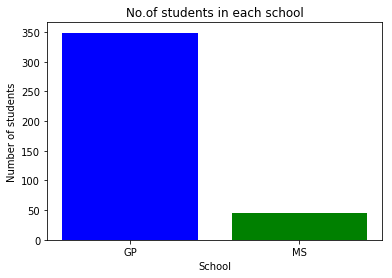

In [65]:
# No.of students in each school
data_school = [d['school'] for d in dataset]

ds = defaultdict(int)
for r in data_school:
    ds[r] += 1
X = list(ds.keys())
Y = list(ds.values())

plt.title('No.of students in each school')
plt.xlabel('School')
plt.ylabel('Number of students')
plt.bar(X, Y, color=['blue','green'])

<BarContainer object of 2 artists>

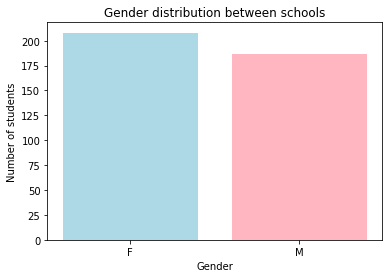

In [71]:
# Gender Distribution
data_gender = [d['sex'] for d in dataset]

dg = defaultdict(int)
for g in data_gender:
    dg[g] += 1
X = list(dg.keys())
Y = list(dg.values())

plt.title('Gender distribution between schools')
plt.xlabel('Gender')
plt.ylabel('Number of students')
plt.bar(X, Y, color=['lightblue','lightpink'])

(array([ 82., 104.,  98.,   0.,  82.,  24.,   0.,   3.,   1.,   1.]),
 array([15. , 15.7, 16.4, 17.1, 17.8, 18.5, 19.2, 19.9, 20.6, 21.3, 22. ]),
 <a list of 10 Patch objects>)

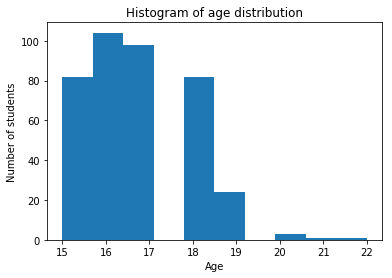

In [75]:
# Age Distribution
age_freq = []
data_age = [d['age'] for d in dataset]
data_age.sort()
dag = defaultdict(int)

for ag in data_age:
    dag[ag] += 1
for key in dag.keys():
    for i in range(0, dag.get(key)):
        age_freq.append(key)
# print(age_freq)

# Plot your histogram here
plt.title('Histogram of age distribution')
plt.xlabel('Age')
plt.ylabel('Number of students')
plt.hist(age_freq)

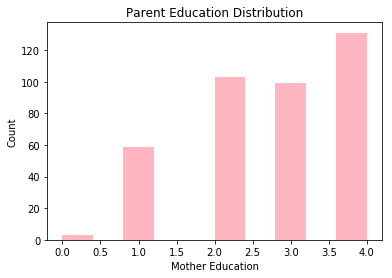

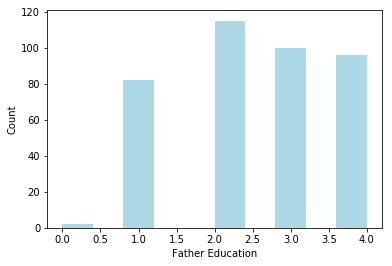

In [79]:
# Parent education distribution (Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
# Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
medu_freq = []
fedu_freq = []
data_medu = [d['Medu'] for d in dataset]
data_fedu = [d['Fedu'] for d in dataset]

data_medu.sort()
data_fedu.sort()

medu = defaultdict(int)
fedu = defaultdict(int)

for i in data_medu:
    medu[i] += 1
for key in medu.keys():
    for i in range(0, medu.get(key)):
        medu_freq.append(key)
        
for i in data_fedu:
    fedu[i] += 1
for key in fedu.keys():
    for i in range(0, fedu.get(key)):
        fedu_freq.append(key)
        
f, ax = plt.subplots()
plt.hist(medu_freq, color = 'lightpink')
ax = ax.set(ylabel="Count", xlabel="Mother Education")

plt.title('Parent Education Distribution')

f, ax = plt.subplots()
plt.hist(fedu_freq, color = 'lightblue')
ax = ax.set(ylabel="Count", xlabel="Father Education")

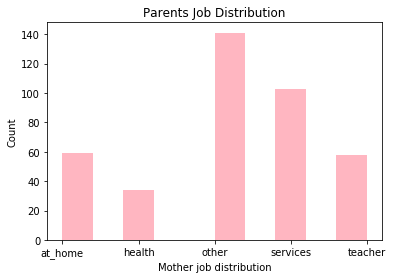

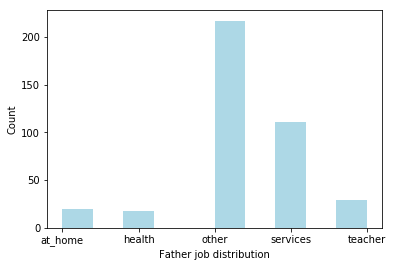

In [80]:
# Parent job distribution
# Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
# Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
mjob_freq = []
fjob_freq = []
data_mjob = [d['Mjob'] for d in dataset]
data_fjob = [d['Fjob'] for d in dataset]

data_mjob.sort()
data_fjob.sort()

mjob = defaultdict(int)
fjob = defaultdict(int)

for i in data_mjob:
    mjob[i] += 1
for key in mjob.keys():
    for i in range(0, mjob.get(key)):
        mjob_freq.append(key)
        
for i in data_fjob:
    fjob[i] += 1
for key in fjob.keys():
    for i in range(0, fjob.get(key)):
        fjob_freq.append(key)
        
f, ax = plt.subplots()
plt.hist(mjob_freq, color = 'lightpink')
ax = ax.set(ylabel="Count", xlabel="Mother job distribution")

plt.title('Parents Job Distribution')

f, ax = plt.subplots()
plt.hist(fjob_freq, color = 'lightblue')
ax = ax.set(ylabel="Count", xlabel="Father job distribution")

Text(0.5, 1.0, 'Weekend alcohol consumption Distribution')

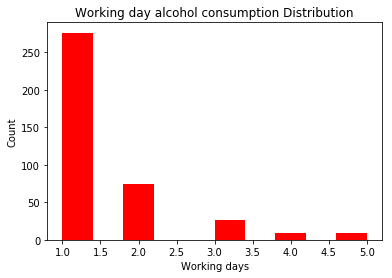

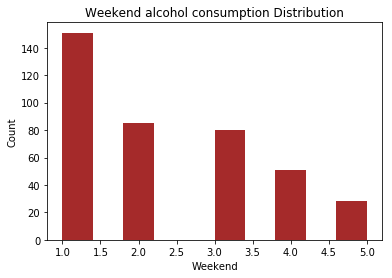

In [81]:
# Distribution of Alcohol Consumption
# Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
# Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

dalc_freq = []
walc_freq = []
data_dalc = [d['Dalc'] for d in dataset]
data_walc = [d['Walc'] for d in dataset]

data_dalc.sort()
data_walc.sort()

dalc = defaultdict(int)
walc = defaultdict(int)

for i in data_dalc:
    dalc[i] += 1
for key in dalc.keys():
    for i in range(0, dalc.get(key)):
        dalc_freq.append(key)
        
for i in data_walc:
    walc[i] += 1
for key in walc.keys():
    for i in range(0, walc.get(key)):
        walc_freq.append(key)
        
f, ax = plt.subplots()
plt.hist(dalc_freq, color = 'Red')
ax = ax.set(ylabel="Count", xlabel="Working days")
plt.title('Working day alcohol consumption Distribution')

f, ax = plt.subplots()
plt.hist(walc_freq, color = 'Brown')
ax = ax.set(ylabel="Count", xlabel="Weekend")
plt.title('Weekend alcohol consumption Distribution')


(array([105.,   0.,   0., 198.,   0.,   0.,  65.,   0.,   0.,  27.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

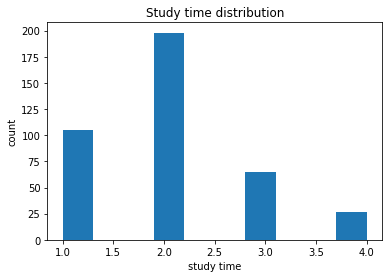

In [83]:
# Study time distribution
st_freq = []
data_st = [d['studytime'] for d in dataset]
data_st.sort()
dst = defaultdict(int)

for st in data_st:
    dst[st] += 1
for key in dst.keys():
    for i in range(0, dst.get(key)):
        st_freq.append(key)


# Plot your histogram here
plt.title('Study time distribution')
plt.xlabel('study time')
plt.ylabel('count')
plt.hist(st_freq)

(array([287.,  72.,  25.,   5.,   1.,   2.,   0.,   2.,   0.,   1.]),
 array([ 0. ,  7.5, 15. , 22.5, 30. , 37.5, 45. , 52.5, 60. , 67.5, 75. ]),
 <a list of 10 Patch objects>)

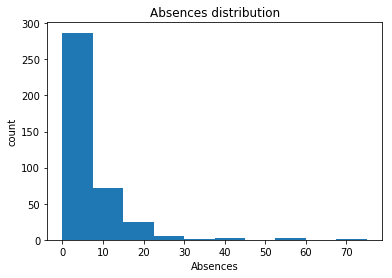

In [84]:
# Absences Distribution
ab_freq = []
data_ab = [d['absences'] for d in dataset]
data_ab.sort()
dab = defaultdict(int)

for ab in data_ab:
    dab[ab] += 1
for key in dab.keys():
    for i in range(0, dab.get(key)):
        ab_freq.append(key)


# Plot your histogram here
plt.title('Absences distribution')
plt.xlabel('Absences')
plt.ylabel('count')
plt.hist(ab_freq)